In [2]:
library(Seurat)
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Mmusculus.v79))
suppressMessages(library(BSgenome.Mmusculus.UCSC.mm10))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(GenomicRanges))
suppressMessages(options(future.globals.maxSize = 360 * 1024 * 1024^2))
suppressMessages(library(motifmatchr))
suppressMessages(library(JASPAR2020))
suppressMessages(library(TFBSTools))
suppressMessages(library(monocle3))
suppressMessages(library(future))
suppressMessages(plan("multisession", workers = 40))

In [4]:
total <- readRDS("Processed_data/scRNA/Step1f_cleaned_annotated.rds")

Idents(total) <- "celltype"
levels(total) <- c("01_Epiblast",
                  '02_Non_neuroectoderm',
                  '03_Epidermal',
                  '04_Placode',
                  '05_Neural_crest',
                  '06_Neuroectoderm',
                  '07_Telencephalon',
                  '08_Diencephalon',
                  '09_Mesencephalon',
                  '10_Rhombomere',
                  '11_Roof_plate')

DefaultAssay(total) <- "RNA"
pbmc.markers <- FindAllMarkers(total, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
saveRDS(pbmc.markers, "Processed_data/scRNA/Total_cluster_markers.rds")

Calculating cluster 01_Epiblast

Calculating cluster 02_Non_neuroectoderm

Calculating cluster 03_Epidermal

Calculating cluster 04_Placode

Calculating cluster 05_Neural_crest

Calculating cluster 06_Neuroectoderm

Calculating cluster 07_Telencephalon

Calculating cluster 08_Diencephalon

Calculating cluster 09_Mesencephalon

Calculating cluster 10_Rhombomere

Calculating cluster 11_Roof_plate



In [12]:
total

An object of class Seurat 
36601 features across 8575 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 5 dimensional reductions calculated: draw_graph_fa, palantir, pca, pca2d, umap

In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
total <- readRDS("Processed_data/scRNA/Step1f_cleaned_annotated.rds")
pbmc.markers <- readRDS("Processed_data/scRNA/Total_cluster_markers.rds")

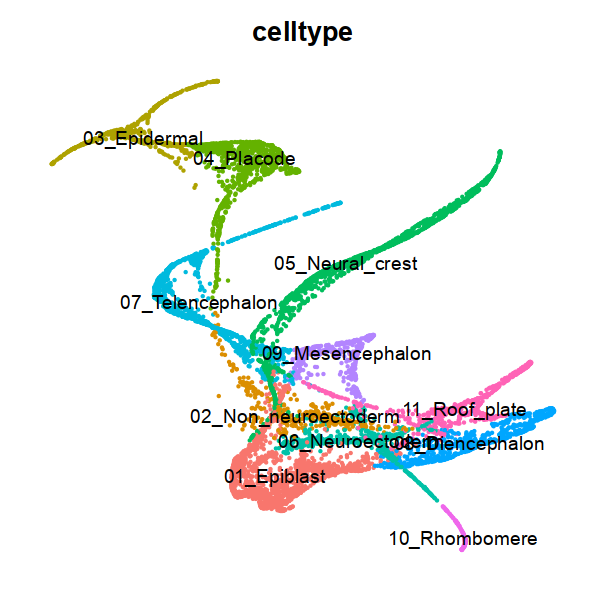

In [3]:
options(repr.plot.width=5, repr.plot.height=5)
DimPlot(total, group.by = 'celltype', reduction = "draw_graph_fa", label = TRUE) & NoAxes() & NoLegend()

Idents(total) <- "celltype"
levels(total) <- c("01_Epiblast",
                  '02_Non_neuroectoderm',
                  '03_Epidermal',
                  '04_Placode',
                  '05_Neural_crest',
                  '06_Neuroectoderm',
                  '07_Telencephalon',
                  '08_Diencephalon',
                  '09_Mesencephalon',
                  '10_Rhombomere',
                  '11_Roof_plate')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


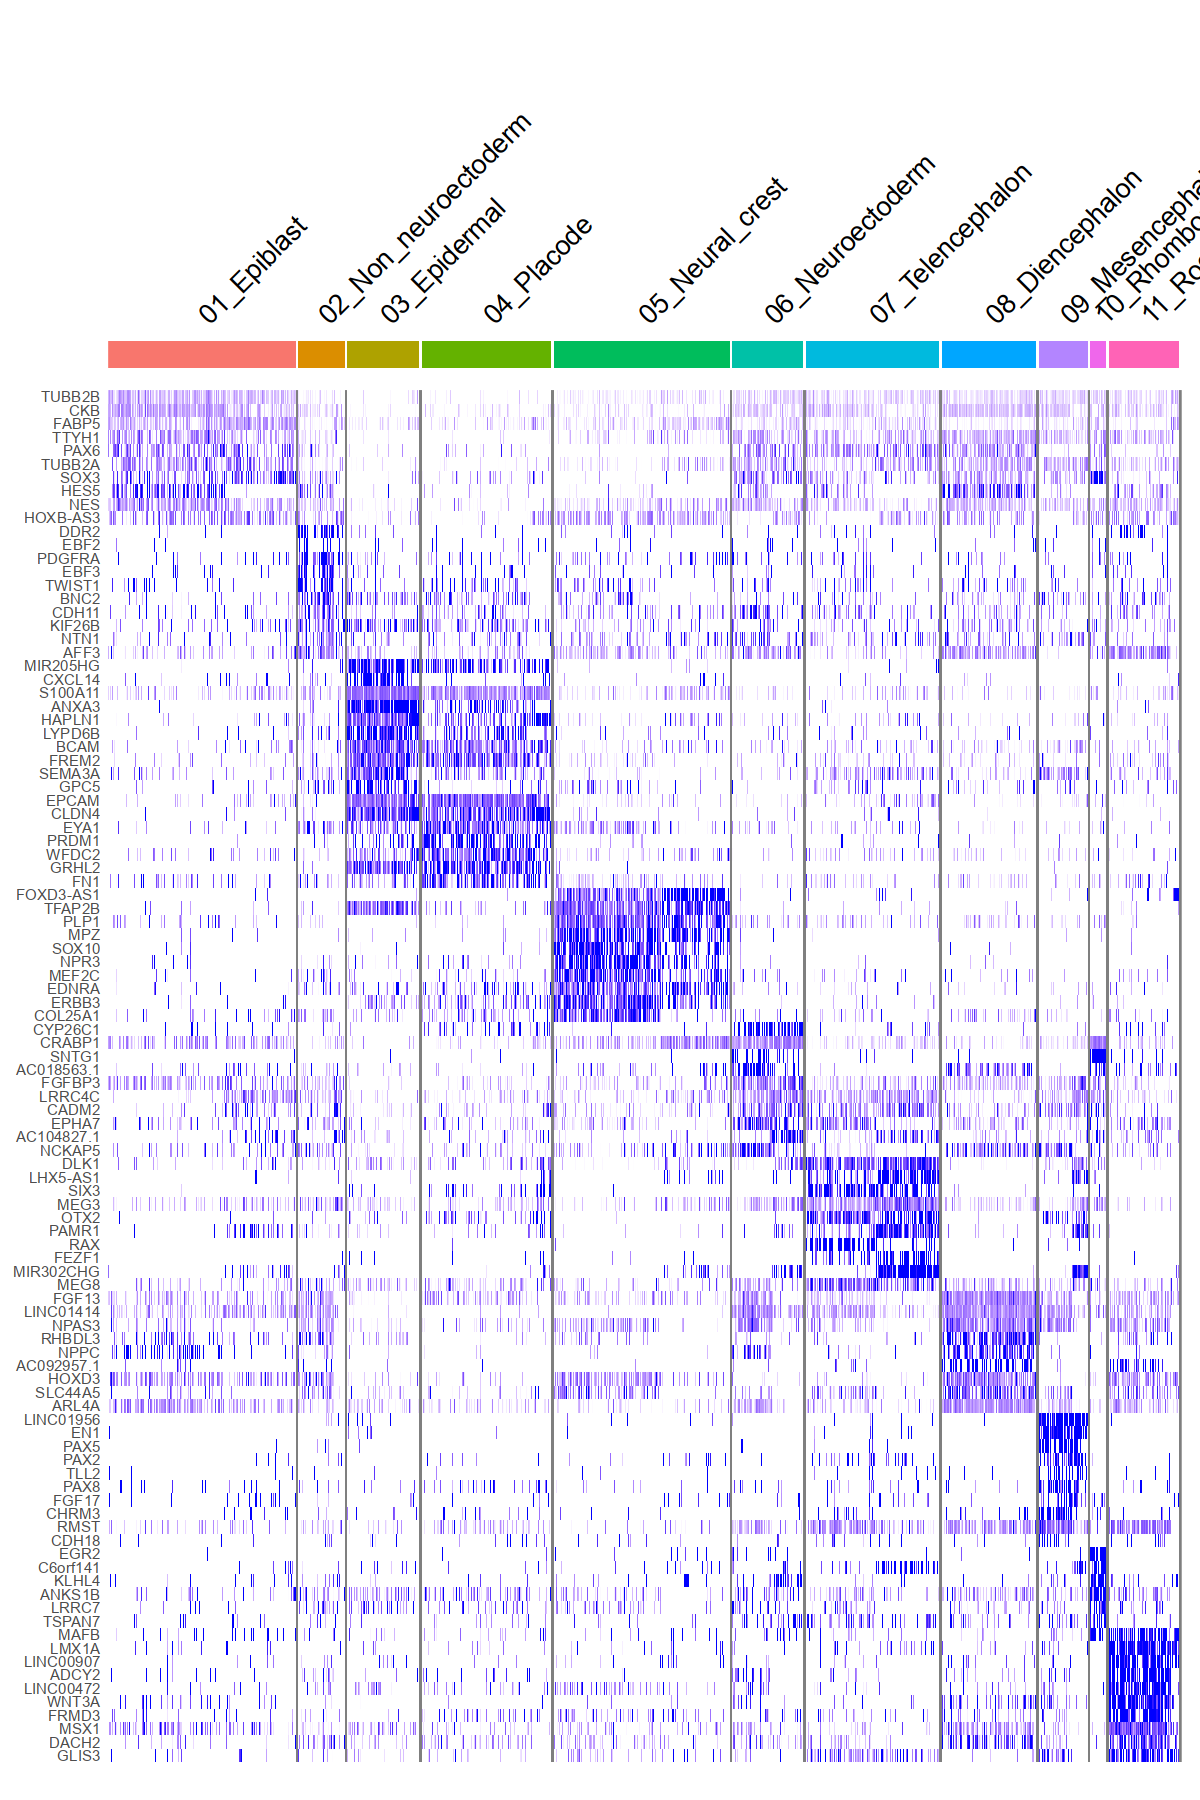

In [9]:
options(repr.plot.width=10, repr.plot.height=15)

pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10

DoHeatmap(total, assay = 'RNA', slot = 'scale.data', features = top10$gene) + NoLegend() + scale_fill_gradientn(colors = c("white", "white", "blue"))


In [11]:
pbmc.markers %>%
    group_by(cluster) %>% filter(!grepl("RPS|RPL", gene)) %>%
    top_n(n = 10000, wt = avg_log2FC) -> top10000

In [14]:
head(top10000, 10)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,0.4494532,0.990,0.983,0.000000e+00,01_Epiblast,TUBA1B
0.000000e+00,0.4127053,0.964,0.956,0.000000e+00,01_Epiblast,RAN
0.000000e+00,0.4096168,0.991,0.988,0.000000e+00,01_Epiblast,HMGB1
0.000000e+00,0.3973166,0.986,0.980,0.000000e+00,01_Epiblast,MIF
0.000000e+00,0.3694416,0.999,0.997,0.000000e+00,01_Epiblast,PTMA
1.695114e-299,0.3594874,0.990,0.986,6.204287e-295,01_Epiblast,NPM1
1.274326e-294,0.6858786,0.917,0.841,4.664161e-290,01_Epiblast,TUBB2B
1.761001e-291,0.4153007,0.988,0.974,6.445438e-287,01_Epiblast,TUBB
1.321185e-290,0.5244911,0.977,0.956,4.835671e-286,01_Epiblast,TUBA1A


In [15]:
saveRDS(top10000, "Processed_data/scRNA/cluster_markers.rds")